<a href="https://colab.research.google.com/github/ravi-gopalan/ipl_analysis/blob/master/ipl_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls -la

total 16
drwxr-xr-x 1 root root 4096 May 31 16:17 .
drwxr-xr-x 1 root root 4096 Jun 11 22:27 ..
drwxr-xr-x 1 root root 4096 Jun  7 16:07 .config
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content

/content


In [0]:
!mkdir ipl

In [5]:
cd /content/ipl

/content/ipl


In [6]:
cd /root

/root


In [0]:
!mkdir .kaggle

In [0]:
!cp '/content/gdrive/My Drive/Colab_stuff/kaggle.json' /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
cd /content/ipl

/content/ipl


In [10]:
!kaggle datasets download -d ravijee/ipl-2008-to-2019 -p /content/ipl

100% 4.14M/4.14M [00:00<00:00, 23.1MB/s]



In [11]:
!ls -la

total 4252
drwxr-xr-x 2 root root    4096 Jun 11 22:39 .
drwxr-xr-x 1 root root    4096 Jun 11 22:39 ..
-rw-r--r-- 1 root root 4345524 Jun 11 22:39 ipl-2008-to-2019.zip


In [12]:
pwd

'/content/ipl'

In [0]:
!unzip -q /content/ipl/ipl-2008-to-2019.zip

In [14]:
!ls -la

total 66180
drwxr-xr-x 2 root root     4096 Jun 11 22:39 .
drwxr-xr-x 1 root root     4096 Jun 11 22:39 ..
---------- 1 root root 61169075 Jun  9 00:37 ball_by_ball_details.csv
-rw-r--r-- 1 root root  4345524 Jun 11 22:39 ipl-2008-to-2019.zip
---------- 1 root root   176133 Jun  9 00:37 ipl_summary.csv
---------- 1 root root  2060580 Jun  9 00:37 ipl.zip


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import datetime as dt

In [0]:
base_dir = Path('/content/ipl')

In [0]:
df_match_summary = pd.read_csv('ipl_summary.csv')

In [18]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
match_id           756 non-null int64
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
dtypes: float64(3), int64(2), object(16)
memory usage: 124.1+ KB


In [0]:
df_match_summary = df_match_summary.set_index('match_id')

In [20]:
df_match_summary.head()

,by,city,competition,dates,decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,teams,umpires,venue,winner,winner_toss,runs,wickets
match_id,,,,,,,,,,,,,,,,,,,,
548336,{'runs': 46},Jaipur,IPL,['2012-04-23'],field,NaN,male,T20,NaN,NaN,20,['AB de Villiers'],NaN,"['Rajasthan Royals', 'Royal Challengers Bangal...","['Asad Rauf', 'S Asnani']",Sawai Mansingh Stadium,Royal Challengers Bangalore,Rajasthan Royals,46.0,NaN
980901,{'wickets': 9},Mumbai,IPL,['2016-04-09'],bat,NaN,male,T20,NaN,NaN,20,['AM Rahane'],NaN,"['Mumbai Indians', 'Rising Pune Supergiants']","['HDPK Dharmasena', 'CK Nandan']",Wankhede Stadium,Rising Pune Supergiants,Mumbai Indians,NaN,9.0
335998,{'runs': 10},Delhi,IPL,['2008-04-30'],field,NaN,male,T20,NaN,NaN,20,['GD McGrath'],NaN,"['Delhi Daredevils', 'Royal Challengers Bangal...","['Aleem Dar', 'I Shivram']",Feroz Shah Kotla,Delhi Daredevils,Royal Challengers Bangalore,10.0,NaN
1178418,{'wickets': 3},Kolkata,IPL,['2019-04-25'],field,NaN,male,T20,NaN,NaN,20,['VR Aaron'],NaN,"['Kolkata Knight Riders', 'Rajasthan Royals']","['AY Dandekar', 'IJ Gould']",Eden Gardens,Rajasthan Royals,Rajasthan Royals,NaN,3.0
1175357,{'wickets': 6},Kolkata,IPL,['2019-03-24'],field,NaN,male,T20,NaN,NaN,20,['AD Russell'],NaN,"['Kolkata Knight Riders', 'Sunrisers Hyderabad']","['CB Gaffaney', 'AK Chaudhary']",Eden Gardens,Kolkata Knight Riders,Kolkata Knight Riders,NaN,6.0


In [0]:
df_match_summary['match_date'] = pd.to_datetime(df_match_summary['dates'].str[2:12])

In [22]:
df_match_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 548336 to 501226
Data columns (total 21 columns):
by                 743 non-null object
city               743 non-null object
competition        756 non-null object
dates              756 non-null object
decision           756 non-null object
eliminator         9 non-null object
gender             756 non-null object
match_type         756 non-null object
method             19 non-null object
neutral_venue      77 non-null float64
overs              756 non-null int64
player_of_match    752 non-null object
result             13 non-null object
teams              756 non-null object
umpires            755 non-null object
venue              756 non-null object
winner             756 non-null object
winner_toss        743 non-null object
runs               337 non-null float64
wickets            406 non-null float64
match_date         756 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(16)
mem

In [0]:
df_match_summary['player_of_match'] = df_match_summary['player_of_match'].str[2:-2]
df_match_summary.drop(['by','dates'], axis=1, inplace=True)
df_match_summary.rename(columns={'decision':'toss_decision'}, inplace=True)

In [24]:
df_teams = pd.DataFrame(df_match_summary.teams.str.split(',',n=2,expand=True))
df_teams.rename(columns={0:'team_1',1:'team_2'},inplace=True)
df_teams.team_1 = df_teams.team_1.str[2:-1] 
df_teams.team_2 = df_teams.team_2.str[2:-2] 
df_teams.head()

,team_1,team_2
match_id,,
548336,Rajasthan Royals,Royal Challengers Bangalore
980901,Mumbai Indians,Rising Pune Supergiants
335998,Delhi Daredevils,Royal Challengers Bangalore
1178418,Kolkata Knight Riders,Rajasthan Royals
1175357,Kolkata Knight Riders,Sunrisers Hyderabad


In [25]:
df_umpires = pd.DataFrame(df_match_summary.umpires.str.split(',',n=4,expand=True))
df_umpires.rename(columns={0:'umpire_1',1:'umpire_2',2:'umpire_3',3:'umpire_4'},inplace=True)
df_umpires.umpire_1 = df_umpires.umpire_1.str[2:-1] 
df_umpires.umpire_2 = df_umpires.umpire_2.str[2:-2]
df_umpires.umpire_3 = df_umpires.umpire_3.str[2:-2]
df_umpires.umpire_4 = df_umpires.umpire_4.str[2:-2]

df_umpires.head()

,umpire_1,umpire_2,umpire_3,umpire_4
match_id,,,,
548336,Asad Rauf,S Asnani,None,None
980901,HDPK Dharmasena,CK Nandan,None,None
335998,Aleem Dar,I Shivram,None,None
1178418,AY Dandekar,IJ Gould,None,None
1175357,CB Gaffaney,AK Chaudhary,None,None


In [0]:
df_match_summary = df_match_summary.join(df_teams) 
df_match_summary = df_match_summary.join(df_umpires) 
df_match_summary.drop(['teams','umpires'], axis=1, inplace=True)
df_match_summary.rename(columns={'runs':'won_by_runs','wickets':'won_by_wickets'}, inplace=True)

Map team names to abbreviations and standardize names

In [0]:
team_names = {'Rajasthan Royals':'RR',\
              'Mumbai Indians' : 'MI',\
              'Delhi Daredevils':'DD',\
              'Kolkata Knight Riders':'KKR',\
              'Kings XI Punjab':'KXP',\
              'Sunrisers Hyderabad':'SRH',\
              'Deccan Chargers':'DC-Chargers',\
              'Chennai Super Kings':'CSK',\
              'Rising Pune Supergiants':'RPS',\
              'Royal Challengers Bangalore':'RCB',\
              'Pune Warriors':'PW',\
              'Gujarat Lions':'GL',\
              'Delhi Capitals':'DC-Capitals',\
              'Rising Pune Supergiant':'RPS',\
              'Kochi Tuskers Kerala':'KTK'
             }

In [0]:
df_match_summary['winner_toss'] = df_match_summary['winner_toss'].map(team_names)

In [0]:
df_match_summary['winner'] = df_match_summary['winner'].map(team_names)
df_match_summary['team_1'] = df_match_summary['team_1'].map(team_names)
df_match_summary['team_2'] = df_match_summary['team_2'].map(team_names)

In [0]:
df_match_summary['season'] = df_match_summary['match_date'].dt.year

In [31]:
df_match_summary.head()

,city,competition,toss_decision,eliminator,gender,match_type,method,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
match_id,,,,,,,,,,,,,,,,,,,,,,,,
548336,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
980901,Mumbai,IPL,bat,NaN,male,T20,NaN,NaN,20,AM Rahane,NaN,Wankhede Stadium,RSP,MI,NaN,9.0,2016-04-09,MI,RSP,HDPK Dharmasena,CK Nandan,None,None,2016
335998,Delhi,IPL,field,NaN,male,T20,NaN,NaN,20,GD McGrath,NaN,Feroz Shah Kotla,DD,RCB,10.0,NaN,2008-04-30,DD,RCB,Aleem Dar,I Shivram,None,None,2008
1178418,Kolkata,IPL,field,NaN,male,T20,NaN,NaN,20,VR Aaron,NaN,Eden Gardens,RR,RR,NaN,3.0,2019-04-25,KKR,RR,AY Dandekar,IJ Gould,None,None,2019
1175357,Kolkata,IPL,field,NaN,male,T20,NaN,NaN,20,AD Russell,NaN,Eden Gardens,KKR,KKR,NaN,6.0,2019-03-24,KKR,SRH,CB Gaffaney,AK Chaudhary,None,None,2019


In [0]:
df_match_summary.to_csv('match_summary.csv')

In [33]:
df_details = pd.read_csv('ball_by_ball_details.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_details = df_details.drop(columns=['by','competition','dates','decision','eliminator','gender','match_type','neutral_venue',\
                                      'overs','player_of_match','city','result','teams','umpires','winner','winner_toss','runs',\
                                      'wickets','match_date','season','venue'])

In [0]:
df_details['batting_team'] = df_details['batting_team'].map(team_names)

In [36]:
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,fielders,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [0]:
df_details['wides'] = df_details['wides'].astype('float')
df_details['noballs'] = df_details['noballs'].astype('float')
df_details['legbyes'] = df_details['legbyes'].astype('float')
df_details['byes'] = df_details['byes'].astype('float')


In [38]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 27 columns):
Unnamed: 0      176711 non-null int64
0               0 non-null float64
0_extras        0 non-null float64
batsman         176702 non-null object
batsman_runs    176702 non-null float64
batting_team    176711 non-null object
bowler          176702 non-null object
byes            476 non-null float64
extras_runs     176061 non-null float64
fielders        6245 non-null object
kind            8702 non-null object
legbyes         2897 non-null float64
level_0         176711 non-null object
level_1         176711 non-null float64
match_id        176711 non-null int64
noballs         702 non-null float64
non_striker     176702 non-null object
player_out      8702 non-null object
total           176702 non-null float64
wides           5337 non-null float64
0.1             0 non-null float64
0_wickets       0 non-null float64
non_boundary    14 non-null float64
extras          641 n

In [39]:
df_fielders = pd.DataFrame(df_details.fielders.str.split(',',n=2,expand=True))


df_fielders.rename(columns={0:'fielder_1',1:'fielder_2',2:'fielder_3'},inplace=True)
df_fielders.head()


,fielder_1,fielder_2,fielder_3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [40]:
df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()]


,fielder_1,fielder_2,fielder_3
13155,['P Negi','CH Morris','Q de Kock']
14840,['LJ Wright','RV Uthappa','AD Mathews']
38293,['AA Jhunjhunwala','FY Fazal','NV Ojha']
58242,['SK Raina','RA Jadeja','MM Sharma']
65764,['STR Binny','Sachin Baby','KK Cooper']
73311,['Joginder Sharma','JDP Oram','MS Dhoni']
92927,['SR Watson','JP Faulkner','DH Yagnik']
114173,['MF Maharoof','Shoaib Malik (sub)','KD Karthik']
139031,['M Vijay','MS Dhoni','JA Morkel']
169068,['Z Khan','KK Nair','Q de Kock']


In [0]:
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\[","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\[","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\[","")
df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\]","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\]","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\]","")


df_fielders['fielder_1'] = df_fielders['fielder_1'].str.replace(r"\'","")
df_fielders['fielder_2'] = df_fielders['fielder_2'].str.replace(r"\'","")
df_fielders['fielder_3'] = df_fielders['fielder_3'].str.replace(r"\'","")

In [42]:
df_fielders[df_fielders['fielder_1'].notnull() & df_fielders['fielder_2'].notnull() & df_fielders['fielder_3'].notnull()]


,fielder_1,fielder_2,fielder_3
13155,P Negi,CH Morris,Q de Kock
14840,LJ Wright,RV Uthappa,AD Mathews
38293,AA Jhunjhunwala,FY Fazal,NV Ojha
58242,SK Raina,RA Jadeja,MM Sharma
65764,STR Binny,Sachin Baby,KK Cooper
73311,Joginder Sharma,JDP Oram,MS Dhoni
92927,SR Watson,JP Faulkner,DH Yagnik
114173,MF Maharoof,Shoaib Malik (sub),KD Karthik
139031,M Vijay,MS Dhoni,JA Morkel
169068,Z Khan,KK Nair,Q de Kock


In [43]:
df_fielders[df_fielders['fielder_1'].notnull()]

,fielder_1,fielder_2,fielder_3
21,BJ Hodge,None,None
57,BJ Hodge,None,None
170,LA Pomersbach (sub),None,None
193,AB de Villiers,None,None
198,MA Agarwal,None,None
206,TM Dilshan,None,None
216,MA Agarwal,None,None
229,DL Vettori,None,None
248,R Vinay Kumar,None,None
275,MS Dhoni,None,None


In [44]:
df_fielders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 3 columns):
fielder_1    6245 non-null object
fielder_2    385 non-null object
fielder_3    11 non-null object
dtypes: object(3)
memory usage: 4.0+ MB


In [0]:
df_details = df_details.join(df_fielders)
df_details.drop(['fielders'], axis=1, inplace=True)
df_details.head()

In [48]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 29 columns):
Unnamed: 0      176711 non-null int64
0               0 non-null float64
0_extras        0 non-null float64
batsman         176702 non-null object
batsman_runs    176702 non-null float64
batting_team    176711 non-null object
bowler          176702 non-null object
byes            476 non-null float64
extras_runs     176061 non-null float64
kind            8702 non-null object
legbyes         2897 non-null float64
level_0         176711 non-null object
level_1         176711 non-null float64
match_id        176711 non-null int64
noballs         702 non-null float64
non_striker     176702 non-null object
player_out      8702 non-null object
total           176702 non-null float64
wides           5337 non-null float64
0.1             0 non-null float64
0_wickets       0 non-null float64
non_boundary    14 non-null float64
extras          641 non-null float64
penalty         2 non

In [0]:
df_details['level_1'] = df_details['level_1'].astype(str)

In [0]:
delivery = {'0.1': '1','0.2': '2', '0.3': '3', '0.4': '4', '0.5': '5', '0.6': '6', '0.7': '7', '0.8': '8', '0.9': '9',\
         '1.1': '1','1.2': '2', '1.3': '3', '1.4': '4', '1.5': '5', '1.6': '6', '1.7': '7', '1.8': '8', '1.9': '9',\
         '2.1': '1','2.2': '2', '2.3': '3', '2.4': '4', '2.5': '5', '2.6': '6', '2.7': '7', '2.8': '8', '2.9': '9',\
         '3.1': '1','3.2': '2', '3.3': '3', '3.4': '4', '3.5': '5', '3.6': '6', '3.7': '7', '3.8': '8', '3.9': '9',\
         '4.1': '1','4.2': '2', '4.3': '3', '4.4': '4', '4.5': '5', '4.6': '6', '4.7': '7', '4.8': '8', '4.9': '9',\
         '5.1': '1','5.2': '2', '5.3': '3', '5.4': '4', '5.5': '5', '5.6': '6', '5.7': '7', '5.8': '8', '5.9': '9',\
         '6.1': '1','6.2': '2', '6.3': '3', '6.4': '4', '6.5': '5', '6.6': '6', '6.7': '7', '6.8': '8', '6.9': '9',\
         '7.1': '1','7.2': '2', '7.3': '3', '7.4': '4', '7.5': '5', '7.6': '6', '7.7': '7', '7.8': '8', '7.9': '9',\
         '8.1': '1','8.2': '2', '8.3': '3', '8.4': '4', '8.5': '5', '8.6': '6', '8.7': '7', '8.8': '8', '8.9': '9',\
         '9.1': '1','9.2': '2', '9.3': '3', '9.4': '4', '9.5': '5', '9.6': '6', '9.7': '7', '9.8': '8', '9.9': '9',\
         '10.1': '1','10.2': '2', '10.3': '3', '10.4': '4', '10.5': '5', '10.6': '6', '10.7': '7', '10.8': '8', '10.9': '9',\
         '11.1': '1','11.2': '2', '11.3': '3', '11.4': '4', '11.5': '5', '11.6': '6', '11.7': '7', '11.8': '8', '11.9': '9',\
         '12.1': '1','12.2': '2', '12.3': '3', '12.4': '4', '12.5': '5', '12.6': '6', '12.7': '7', '12.8': '8', '12.9': '9',\
         '13.1': '1','13.2': '2', '13.3': '3', '13.4': '4', '13.5': '5', '13.6': '6', '13.7': '7', '13.8': '8', '13.9': '9',\
         '14.1': '1','14.2': '2', '14.3': '3', '14.4': '4', '14.5': '5', '14.6': '6', '14.7': '7', '14.8': '8', '14.9': '9',\
         '15.1': '1','15.2': '2', '15.3': '3', '15.4': '4', '15.5': '5', '15.6': '6', '15.7': '7', '15.8': '8', '15.9': '9',\
         '16.1': '1','16.2': '2', '16.3': '3', '16.4': '4', '16.5': '5', '16.6': '6', '16.7': '7', '16.8': '8', '16.9': '9',\
         '17.1': '1','17.2': '2', '17.3': '3', '17.4': '4', '17.5': '5', '17.6': '6', '17.7': '7', '17.8': '8', '17.9': '9',\
         '18.1': '1','18.2': '2', '18.3': '3', '18.4': '4', '18.5': '5', '18.6': '6', '18.7': '7', '18.8': '8', '18.9': '9',\
         '19.1': '1','19.2': '2', '19.3': '3', '19.4': '4', '19.5': '5', '19.6': '6', '19.7': '7', '19.8': '8', '19.9': '9',\
        }

In [0]:
df_details['delivery'] = df_details['level_1'].map(delivery)

In [52]:
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5


In [53]:
df_details[df_details.player_out.notna()]

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery
21,21,NaN,NaN,V Kohli,0.0,RCB,Pankaj Singh,NaN,0.0,caught,NaN,inning_1,3.4,548336,NaN,TM Dilshan,V Kohli,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,BJ Hodge,None,None,4
57,57,NaN,NaN,MA Agarwal,0.0,RCB,GB Hogg,NaN,0.0,caught,NaN,inning_1,9.4,548336,NaN,TM Dilshan,MA Agarwal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,BJ Hodge,None,None,4
69,69,NaN,NaN,CH Gayle,0.0,RCB,GB Hogg,NaN,0.0,lbw,NaN,inning_1,11.4,548336,NaN,TM Dilshan,CH Gayle,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,4
170,170,NaN,NaN,AM Rahane,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,7.2,548336,NaN,R Dravid,AM Rahane,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LA Pomersbach (sub),None,None,2
193,193,NaN,NaN,OA Shah,0.0,RR,KP Appanna,NaN,0.0,stumped,NaN,inning_2,11.1,548336,NaN,R Dravid,OA Shah,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,AB de Villiers,None,None,1
198,198,NaN,NaN,SP Goswami,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,11.6,548336,NaN,R Dravid,SP Goswami,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,MA Agarwal,None,None,6
206,206,NaN,NaN,R Dravid,0.0,RR,KP Appanna,NaN,0.0,caught,NaN,inning_2,13.1,548336,NaN,BJ Hodge,R Dravid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,TM Dilshan,None,None,1
216,216,NaN,NaN,BJ Hodge,0.0,RR,HV Patel,NaN,0.0,caught,NaN,inning_2,14.5,548336,NaN,STR Binny,BJ Hodge,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,MA Agarwal,None,None,5
229,229,NaN,NaN,KK Cooper,0.0,RR,Z Khan,NaN,0.0,caught,NaN,inning_2,16.5,548336,NaN,STR Binny,KK Cooper,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,DL Vettori,None,None,5
248,248,NaN,NaN,GB Hogg,0.0,RR,HV Patel,NaN,0.0,caught,NaN,inning_2,19.6,548336,NaN,STR Binny,GB Hogg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,R Vinay Kumar,None,None,6


In [54]:
df_details['kind'].unique()

array([nan, 'caught', 'lbw', 'stumped', 'bowled', 'run out', 'hit wicket',
       'caught and bowled', 'retired hurt', 'obstructing the field'],
      dtype=object)

In [0]:
def attribute_catch (row):
  if row['kind'] == 'caught':
    value = row['fielder_1']
  elif row['kind'] == 'caught and bowled':
    value = row['bowler']
  else:
    value = None
  return value

In [0]:
df_details['catch_attributed_to'] = df_details.apply (lambda row: attribute_catch(row), axis=1)

In [0]:
def attribute_wicket (row):
    if row['kind'] == 'caught':
      value = row['bowler']
    elif row['kind'] == 'lbw':
      value = row['bowler']
    elif row['kind'] == 'stumped':
      value = row['bowler']
    elif row['kind'] == 'bowled':
      value = row['bowler']
    elif row['kind'] == 'hit wicket':
      value = row['bowler']
    elif row['kind'] == 'caught and bowled':
      value = row['bowler']
    else:
      value = None
    return value

In [0]:
df_details['wicket_attributed_to'] = df_details.apply( lambda row: attribute_wicket(row), axis = 1)

In [59]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 32 columns):
Unnamed: 0              176711 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
batsman                 176702 non-null object
batsman_runs            176702 non-null float64
batting_team            176711 non-null object
bowler                  176702 non-null object
byes                    476 non-null float64
extras_runs             176061 non-null float64
kind                    8702 non-null object
legbyes                 2897 non-null float64
level_0                 176711 non-null object
level_1                 176711 non-null object
match_id                176711 non-null int64
noballs                 702 non-null float64
non_striker             176702 non-null object
player_out              8702 non-null object
total                   176702 non-null float64
wides                   5337 non-null float64
0.1          

In [60]:
df_details['wicket_attributed_to'].value_counts()


SL Malinga           168
A Mishra             155
Harbhajan Singh      149
PP Chawla            148
DJ Bravo             147
B Kumar              132
R Ashwin             125
SP Narine            122
UT Yadav             117
RA Jadeja            108
A Nehra              105
Z Khan               102
R Vinay Kumar        101
YS Chahal            100
DW Steyn              95
Sandeep Sharma        94
SR Watson             92
MM Sharma             91
RP Singh              90
P Kumar               90
PP Ojha               89
DS Kulkarni           86
JA Morkel             83
IK Pathan             79
Imran Tahir           79
JJ Bumrah             78
L Balaji              75
M Morkel              75
MM Patel              73
JD Unadkat            73
                    ... 
AC Gilchrist           1
SS Mundhe              1
RG More                1
Y Prithvi Raj          1
Swapnil Singh          1
DJM Short              1
PM Sarvesh Kumar       1
D Salunkhe             1
LA Carseldine          1


In [61]:
df_details.query('kind == "caught and bowled"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1263 to 176268
Data columns (total 32 columns):
Unnamed: 0              250 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
batsman                 250 non-null object
batsman_runs            250 non-null float64
batting_team            250 non-null object
bowler                  250 non-null object
byes                    0 non-null float64
extras_runs             250 non-null float64
kind                    250 non-null object
legbyes                 0 non-null float64
level_0                 250 non-null object
level_1                 250 non-null object
match_id                250 non-null int64
noballs                 0 non-null float64
non_striker             250 non-null object
player_out              250 non-null object
total                   250 non-null float64
wides                   0 non-null float64
0.1                     0 non-null float64
0_wickets      

In [62]:
df_details.query('kind == "caught"')['fielder_1']

21                   BJ Hodge
57                   BJ Hodge
170       LA Pomersbach (sub)
198                MA Agarwal
206                TM Dilshan
216                MA Agarwal
229                DL Vettori
248             R Vinay Kumar
275                  MS Dhoni
280                  R Ashwin
319                 AM Rahane
344              F du Plessis
366                 SPD Smith
557                  R Dravid
578                   P Kumar
593                  S Dhawan
614                  S Dhawan
618                 VY Mahesh
682                  V Sehwag
759                  VR Aaron
811                   R Parag
815                 AM Rahane
894                AD Russell
911                  RK Singh
928              Shubman Gill
1052               RV Uthappa
1088              Rashid Khan
1153                  B Kumar
1298                  J Botha
1341                 AR Patel
                 ...         
175749              LJ Wright
175788             RV Uthappa
175790    

In [63]:
df_details.head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to
0,0,NaN,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,None,None
1,1,NaN,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,None,None
2,2,NaN,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,None,None
3,3,NaN,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,None,None
4,4,NaN,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,None,None


In [64]:
df_details['batsman_runs'][df_details['batsman_runs'] == 6.0].count()

8082

In [0]:
def flag_boundary_4 (row):
    if row['batsman_runs'] == 4.0:
      value = 1
    else:
      value = None  
    return value

def flag_boundary_6 (row):
    if row['batsman_runs'] == 6.0:
      value = 1
    else:
      value = None  
    return value

def flag_dot_ball (row):
    if row['batsman_runs'] == 0.0:
      value = 1
    else:
      value = None  
    return value
  
  
def flag_1_run_ball (row):
    if row['batsman_runs'] == 1.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_2_run_ball (row):
    if row['batsman_runs'] == 2.0:
      value = 1
    else:
      value = None  
    return value

def flag_3_run_ball (row):
    if row['batsman_runs'] == 3.0:
      value = 1
    else:
      value = None  
    return value
  
def flag_5_run_ball (row):
    if row['batsman_runs'] == 5.0:
      value = 1
    else:
      value = None  
    return value

In [0]:
df_details['4_flag'] = df_details.apply(lambda row: flag_boundary_4(row), axis=1)
df_details['6_flag'] = df_details.apply( lambda row: flag_boundary_6(row), axis = 1)
df_details['dot_ball_flag'] = df_details.apply( lambda row: flag_dot_ball(row), axis = 1)
df_details['1_run_flag'] = df_details.apply( lambda row: flag_1_run_ball(row), axis = 1)
df_details['2_run_flag'] = df_details.apply( lambda row: flag_2_run_ball(row), axis = 1)
df_details['3_run_flag'] = df_details.apply( lambda row: flag_3_run_ball(row), axis = 1)
df_details['5_run_flag'] = df_details.apply( lambda row: flag_5_run_ball(row), axis = 1)

In [69]:
df_details[df_details['wides'].notna()].head()

,Unnamed: 0,0,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag
71,71,NaN,NaN,TM Dilshan,0.0,RCB,GB Hogg,NaN,5.0,NaN,NaN,inning_1,11.6,548336,NaN,AB de Villiers,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,6,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN
104,104,NaN,NaN,TM Dilshan,0.0,RCB,KK Cooper,NaN,1.0,NaN,NaN,inning_1,17.1,548336,NaN,AB de Villiers,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN
121,121,NaN,NaN,AB de Villiers,0.0,RCB,KK Cooper,NaN,1.0,NaN,NaN,inning_1,19.4,548336,NaN,TM Dilshan,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN
126,126,NaN,NaN,R Dravid,0.0,RR,Z Khan,NaN,1.0,NaN,NaN,inning_2,0.2,548336,NaN,AM Rahane,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN
131,131,NaN,NaN,AM Rahane,0.0,RR,Z Khan,NaN,1.0,NaN,NaN,inning_2,0.7,548336,NaN,R Dravid,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,7,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [0]:
df_details['wide_flag'] = df_details['wides'].notna()
df_details['noball_flag'] = df_details['noballs'].notna()
df_details['legbye_flag'] = df_details['legbyes'].notna()
df_details['bye_flag'] = df_details['byes'].notna()

In [71]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 43 columns):
Unnamed: 0              176711 non-null int64
0                       0 non-null float64
0_extras                0 non-null float64
batsman                 176702 non-null object
batsman_runs            176702 non-null float64
batting_team            176711 non-null object
bowler                  176702 non-null object
byes                    476 non-null float64
extras_runs             176061 non-null float64
kind                    8702 non-null object
legbyes                 2897 non-null float64
level_0                 176711 non-null object
level_1                 176711 non-null object
match_id                176711 non-null int64
noballs                 702 non-null float64
non_striker             176702 non-null object
player_out              8702 non-null object
total                   176702 non-null float64
wides                   5337 non-null float64
0.1          

In [0]:
df_details.drop(['0'], inplace=True, axis=1)

In [0]:
df_details.drop(['Unnamed: 0'], inplace=True, axis=1)

In [74]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 41 columns):
0_extras                0 non-null float64
batsman                 176702 non-null object
batsman_runs            176702 non-null float64
batting_team            176711 non-null object
bowler                  176702 non-null object
byes                    476 non-null float64
extras_runs             176061 non-null float64
kind                    8702 non-null object
legbyes                 2897 non-null float64
level_0                 176711 non-null object
level_1                 176711 non-null object
match_id                176711 non-null int64
noballs                 702 non-null float64
non_striker             176702 non-null object
player_out              8702 non-null object
total                   176702 non-null float64
wides                   5337 non-null float64
0.1                     0 non-null float64
0_wickets               0 non-null float64
non_boundary    

In [75]:
df_details.head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,wide_flag,noball_flag,legbye_flag,bye_flag
0,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
1,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False
2,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
3,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False
4,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,False,False,False,False


In [0]:
df_not_out_check = df_details[['match_id','level_0','batsman','player_out','kind']].drop_duplicates()

In [77]:
df_not_out_check.query('kind=="run out"')

,match_id,level_0,batsman,player_out,kind
497,335998,inning_1,G Gambhir,V Sehwag,run out
778,1178418,inning_1,KD Karthik,SP Narine,run out
1428,829791,inning_2,J Botha,J Botha,run out
1440,829791,inning_2,PP Chawla,GB Hogg,run out
1771,1175366,inning_1,DA Warner,V Shankar,run out
1824,1175366,inning_2,S Dube,MM Ali,run out
1893,1175366,inning_2,C de Grandhomme,UT Yadav,run out
1901,1175366,inning_2,Mohammed Siraj,C de Grandhomme,run out
1983,1136608,inning_1,R Ashwin,R Ashwin,run out
1995,1136608,inning_1,MM Sharma,MM Sharma,run out


In [78]:
df_not_out_check.head(5)

,match_id,level_0,batsman,player_out,kind
0,548336,inning_1,V Kohli,NaN,NaN
2,548336,inning_1,TM Dilshan,NaN,NaN
21,548336,inning_1,V Kohli,V Kohli,caught
23,548336,inning_1,MA Agarwal,NaN,NaN
57,548336,inning_1,MA Agarwal,MA Agarwal,caught


In [0]:
def check_out(row):
  if row['kind'] != 'NaN' and row['player_out'] == row['batsman']:
    value = row['batsman']
  elif row['kind'] !='NaN' and row['player_out'] != row['batsman']:
    value = row['player_out']
  else:
    value = None
  return value

In [0]:
df_not_out_check['out'] = df_not_out_check.apply(lambda row: check_out(row),axis=1)

In [81]:
df_not_out_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19434 entries, 0 to 176708
Data columns (total 6 columns):
match_id      19434 non-null int64
level_0       19434 non-null object
batsman       19425 non-null object
player_out    8702 non-null object
kind          8702 non-null object
out           8702 non-null object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [82]:
df_not_out_check.query('kind=="run out"').head()

,match_id,level_0,batsman,player_out,kind,out
497,335998,inning_1,G Gambhir,V Sehwag,run out,V Sehwag
778,1178418,inning_1,KD Karthik,SP Narine,run out,SP Narine
1428,829791,inning_2,J Botha,J Botha,run out,J Botha
1440,829791,inning_2,PP Chawla,GB Hogg,run out,GB Hogg
1771,1175366,inning_1,DA Warner,V Shankar,run out,V Shankar


In [0]:
df_not_out = df_not_out_check.groupby(['match_id','level_0','player_out'],as_index=False)['out'].count()

In [84]:
df_not_out.head()

,match_id,level_0,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [85]:
df_not_out.tail()

,match_id,level_0,player_out,out
8697,1181768,inning_2,F du Plessis,1
8698,1181768,inning_2,MS Dhoni,1
8699,1181768,inning_2,SK Raina,1
8700,1181768,inning_2,SN Thakur,1
8701,1181768,inning_2,SR Watson,1


In [199]:
df_not_out.head()

,match_id,level_0,batsman,player_out
0,335982,inning_1,BB McCullum,0
1,335982,inning_1,DJ Hussey,1
2,335982,inning_1,Mohammad Hafeez,0
3,335982,inning_1,RT Ponting,1
4,335982,inning_1,SC Ganguly,1


In [87]:
df_not_out.player_out.nunique()

486

In [91]:
df_not_out.query('match_id=="336002"')

,match_id,level_0,player_out,out
236,336002,inning_1,AC Gilchrist,1
237,336002,inning_1,AS Yadav,1
238,336002,inning_1,DB Ravi Teja,1
239,336002,inning_1,HH Gibbs,1
240,336002,inning_1,LPC Silva,1
241,336002,inning_1,RG Sharma,1
242,336002,inning_1,RP Singh,1
243,336002,inning_1,SB Bangar,1
244,336002,inning_1,WPUJC Vaas,1
245,336002,inning_1,Y Venugopal Rao,1


In [94]:
df_details.query('match_id=="336002" & kind =="run out"')

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,wide_flag,noball_flag,legbye_flag,bye_flag
21848,NaN,AS Yadav,0.0,DC-Chargers,R Vinay Kumar,NaN,0.0,run out,NaN,inning_1,18.4,336002,NaN,SB Bangar,SB Bangar,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,R Vinay Kumar,None,None,4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
21853,NaN,AS Yadav,0.0,DC-Chargers,DW Steyn,NaN,0.0,run out,NaN,inning_1,19.2,336002,NaN,WPUJC Vaas,WPUJC Vaas,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,SP Goswami,None,None,2,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
21873,NaN,JH Kallis,0.0,RCB,WPUJC Vaas,NaN,0.0,run out,NaN,inning_2,2.4,336002,NaN,W Jaffer,W Jaffer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,AS Yadav,None,None,4,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False
21899,NaN,JH Kallis,0.0,RCB,SB Bangar,NaN,0.0,run out,NaN,inning_2,6.6,336002,NaN,Misbah-ul-Haq,JH Kallis,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,LPC Silva,None,None,6,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False


In [95]:
df_not_out.query('match_id =="335989"')

,match_id,level_0,player_out,out
79,335989,inning_1,MEK Hussey,1
80,335989,inning_1,ML Hayden,1
81,335989,inning_1,MS Dhoni,1
82,335989,inning_1,PA Patel,1
83,335989,inning_1,SK Raina,1
84,335989,inning_2,DJ Bravo,1
85,335989,inning_2,Harbhajan Singh,1
86,335989,inning_2,L Ronchi,1
87,335989,inning_2,MA Khote,1
88,335989,inning_2,RV Uthappa,1


In [96]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8702 entries, 0 to 8701
Data columns (total 4 columns):
match_id      8702 non-null int64
level_0       8702 non-null object
player_out    8702 non-null object
out           8702 non-null int64
dtypes: int64(2), object(2)
memory usage: 339.9+ KB


In [97]:
df_not_out.head()

,match_id,level_0,player_out,out
0,335982,inning_1,DJ Hussey,1
1,335982,inning_1,RT Ponting,1
2,335982,inning_1,SC Ganguly,1
3,335982,inning_2,AA Noffke,1
4,335982,inning_2,B Akhil,1


In [0]:
df_not_out.to_csv('players_out_by_match_view.csv')

In [99]:
df_details['0_extras'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 0_extras, dtype: float64

In [0]:
df_details.to_csv('cleansed_ball_by_ball_details.csv')

In [0]:
df_combined = df_details.join(df_match_summary,on='match_id',rsuffix='_ipl_summary')

In [0]:
overs = {'0.1': '1','0.2': '1', '0.3': '1', '0.4': '1', '0.5': '1', '0.6': '1', '0.7': '1', '0.8': '1', '0.9': '1',\
         '1.1': '2','1.2': '2', '1.3': '2', '1.4': '2', '1.5': '2', '1.6': '2', '1.7': '2', '1.8': '2', '1.9': '2',\
         '2.1': '3','2.2': '3', '2.3': '3', '2.4': '3', '2.5': '3', '2.6': '3', '2.7': '3', '2.8': '3', '2.9': '3',\
         '3.1': '4','3.2': '4', '3.3': '4', '3.4': '4', '3.5': '4', '3.6': '4', '3.7': '4', '3.8': '4', '3.9': '4',\
         '4.1': '5','4.2': '5', '4.3': '5', '4.4': '5', '4.5': '5', '4.6': '5', '4.7': '5', '4.8': '5', '4.9': '5',\
         '5.1': '6','5.2': '6', '5.3': '6', '5.4': '6', '5.5': '6', '5.6': '6', '5.7': '6', '5.8': '6', '5.9': '6',\
         '6.1': '7','6.2': '7', '6.3': '7', '6.4': '7', '6.5': '7', '6.6': '7', '6.7': '7', '6.8': '7', '6.9': '7',\
         '7.1': '8','7.2': '8', '7.3': '8', '7.4': '8', '7.5': '8', '7.6': '8', '7.7': '8', '7.8': '8', '7.9': '8',\
         '8.1': '9','8.2': '9', '8.3': '9', '8.4': '9', '8.5': '9', '8.6': '9', '8.7': '9', '8.8': '9', '8.9': '9',\
         '9.1': '10','9.2': '10', '9.3': '10', '9.4': '10', '9.5': '10', '9.6': '10', '9.7': '10', '9.8': '10', '9.9': '10',\
         '10.1': '11','10.2': '11', '10.3': '11', '10.4': '11', '10.5': '11', '10.6': '11', '10.7': '11', '10.8': '11', '10.9': '11',\
         '11.1': '12','11.2': '12', '11.3': '12', '11.4': '12', '11.5': '12', '11.6': '12', '11.7': '12', '11.8': '12', '11.9': '12',\
         '12.1': '13','12.2': '13', '12.3': '13', '12.4': '13', '12.5': '13', '12.6': '13', '12.7': '13', '12.8': '13', '12.9': '13',\
         '13.1': '14','13.2': '14', '13.3': '14', '13.4': '14', '13.5': '14', '13.6': '14', '13.7': '14', '13.8': '14', '13.9': '14',\
         '14.1': '15','14.2': '15', '14.3': '15', '14.4': '15', '14.5': '15', '14.6': '15', '14.7': '15', '14.8': '15', '14.9': '15',\
         '15.1': '16','15.2': '16', '15.3': '16', '15.4': '16', '15.5': '16', '15.6': '16', '15.7': '16', '15.8': '16', '15.9': '16',\
         '16.1': '17','16.2': '17', '16.3': '17', '16.4': '17', '16.5': '17', '16.6': '17', '16.7': '17', '16.8': '17', '16.9': '17',\
         '17.1': '18','17.2': '18', '17.3': '18', '17.4': '18', '17.5': '18', '17.6': '18', '17.7': '18', '17.8': '18', '17.9': '18',\
         '18.1': '19','18.2': '19', '18.3': '19', '18.4': '19', '18.5': '19', '18.6': '19', '18.7': '19', '18.8': '19', '18.9': '19',\
         '19.1': '20','19.2': '20', '19.3': '20', '19.4': '20', '19.5': '20', '19.6': '20', '19.7': '20', '19.8': '20', '19.9': '20'
        }

In [0]:
df_combined['over'] = df_combined['level_1'].map(overs)

In [0]:
df_combined['delivery'] = df_combined['level_1'].map(delivery)

In [105]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176711 entries, 0 to 176710
Data columns (total 65 columns):
0_extras                0 non-null float64
batsman                 176702 non-null object
batsman_runs            176702 non-null float64
batting_team            176711 non-null object
bowler                  176702 non-null object
byes                    476 non-null float64
extras_runs             176061 non-null float64
kind                    8702 non-null object
legbyes                 2897 non-null float64
level_0                 176711 non-null object
level_1                 176711 non-null object
match_id                176711 non-null int64
noballs                 702 non-null float64
non_striker             176702 non-null object
player_out              8702 non-null object
total                   176702 non-null float64
wides                   5337 non-null float64
0.1                     0 non-null float64
0_wickets               0 non-null float64
non_boundary    

In [0]:
df_combined.to_csv('full_ipl_details.csv')

In [107]:
df_combined.tail()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
176706,NaN,NL McCullum,0.0,PW,DE Bollinger,NaN,0.0,caught,NaN,inning_2,19.2,501226,NaN,M Kartik,NL McCullum,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,SB Jakati,None,None,2,SB Jakati,DE Bollinger,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176707,NaN,M Kartik,1.0,PW,DE Bollinger,NaN,0.0,NaN,NaN,inning_2,19.3,501226,NaN,AC Thomas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,3,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176708,NaN,AC Thomas,1.0,PW,DE Bollinger,NaN,0.0,NaN,NaN,inning_2,19.4,501226,NaN,M Kartik,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176709,NaN,M Kartik,0.0,PW,DE Bollinger,NaN,1.0,NaN,1.0,inning_2,19.5,501226,NaN,AC Thomas,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,5,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,True,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011
176710,NaN,AC Thomas,0.0,PW,DE Bollinger,NaN,0.0,NaN,NaN,inning_2,19.6,501226,NaN,M Kartik,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,6,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False,Chennai,IPL,field,NaN,male,T20,NaN,NaN,20,MEK Hussey,NaN,"MA Chidambaram Stadium, Chepauk",CSK,PW,25.0,NaN,2011-04-25,CSK,PW,Aleem Dar,RB Tiffin,None,None,2011


In [0]:
def calc_batting_strike_rate(row):
  if row['net_balls_faced'] != 0:
    value = row['runs_scored']/row['net_balls_faced']
  else:
    value = 0
  return value

In [154]:
# Define the aggregation calculations
batsman_aggregations = {
    'batsman_runs': { # work on the "batsman_runs" column
        'runs_scored': 'sum',  # get the sum, and call this result 'total_duration'
        'gross_balls_faced': 'count'
    },
    '4_flag': {     # Now work on the "4_flag" column
        '4s': 'count'},
    '6_flag': {     # Now work on the "6_flag" column
        '6s': 'count'},
    'dot_ball_flag': {     # Now work on the "dot_ball_flag" column
        'dot_balls': 'count'},
    'wide_flag': {     # Now work on the "wide_flag" column
        'wides_faced': 'sum'},
    'noball_flag': {     # Now work on the "noball_flag" column
        'no_balls_faced': 'sum'}, 
    '1_run_flag': {     # Now work on the "1_run_flag" column
        '1s': 'count'},
    '2_run_flag': {     # Now work on the "2_run_flag" column
        '2s': 'count'},
    '3_run_flag': {     # Now work on the "3_run_flag" column
        '3s': 'count'},
    '5_run_flag': {     # Now work on the "5_run_flag" column
        '5s': 'count'}  

}
df_batsman = df_combined.groupby(['match_id','season',\
                                  'match_date','batsman'],as_index=False)['batsman_runs','4_flag','6_flag','dot_ball_flag',\
                                                                          '1_run_flag','2_run_flag','3_run_flag','5_run_flag',\
                                                                          'wide_flag','noball_flag'].agg(batsman_aggregations)
df_batsman['net_balls_faced'] = df_batsman['gross_balls_faced']-df_batsman['wides_faced']-df_batsman['no_balls_faced']
df_batsman['strike_rate'] = df_batsman.apply(lambda row: calc_batting_strike_rate(row), axis=1)

df_batsman.head(20)

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000
2,335982,2008,2008-04-18,BB McCullum,158.0,77,10,13,23,4.0,0.0,22,9,0,0,73.0,2.164384
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000
4,335982,2008,2008-04-18,DJ Hussey,12.0,12,1,0,4,0.0,0.0,6,1,0,0,12.0,1.000000
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778
7,335982,2008,2008-04-18,Mohammad Hafeez,5.0,3,1,0,1,0.0,0.0,1,0,0,0,3.0,1.666667
8,335982,2008,2008-04-18,P Kumar,18.0,17,1,2,12,2.0,0.0,2,0,0,0,15.0,1.200000
9,335982,2008,2008-04-18,R Dravid,2.0,3,0,0,1,0.0,0.0,2,0,0,0,3.0,0.666667


In [155]:
df_batsman.query('net_balls_faced==0')

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
5299,598031,2013,2013-04-26,SMSM Senanayake,0.0,1,0,0,1,0.0,1.0,0,0,0,0,0.0,0.0
6272,733979,2014,2014-05-05,MK Pandey,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0
8228,980983,2016,2016-05-12,BB Sran,1.0,1,0,0,0,0.0,1.0,1,0,0,0,0.0,0.0
9604,1136574,2018,2018-04-17,MJ McClenaghan,0.0,1,0,0,1,1.0,0.0,0,0,0,0,0.0,0.0


In [156]:
df_batsman.tail(20)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate
11121,1181767,2019,2019-05-10,SR Watson,50.0,34,3,4,14,2.0,0.0,12,1,0,0,32.0,1.562500
11122,1181767,2019,2019-05-10,SS Iyer,13.0,18,1,0,8,0.0,0.0,9,0,0,0,18.0,0.722222
11123,1181767,2019,2019-05-10,TA Boult,6.0,3,0,1,2,0.0,0.0,0,0,0,0,3.0,2.000000
11124,1181768,2019,2019-05-12,AT Rayudu,1.0,4,0,0,3,0.0,0.0,1,0,0,0,4.0,0.250000
11125,1181768,2019,2019-05-12,DJ Bravo,15.0,15,0,1,6,0.0,0.0,7,1,0,0,15.0,1.000000
11126,1181768,2019,2019-05-12,F du Plessis,26.0,13,3,1,5,0.0,0.0,3,0,0,1,13.0,2.000000
11127,1181768,2019,2019-05-12,HH Pandya,16.0,10,1,1,2,0.0,0.0,6,0,0,0,10.0,1.600000
11128,1181768,2019,2019-05-12,Ishan Kishan,23.0,28,3,0,14,2.0,0.0,11,0,0,0,26.0,0.884615
11129,1181768,2019,2019-05-12,KA Pollard,41.0,25,3,3,8,0.0,0.0,11,0,0,0,25.0,1.640000
11130,1181768,2019,2019-05-12,KH Pandya,7.0,7,0,0,3,0.0,0.0,1,3,0,0,7.0,1.000000


In [149]:
df_not_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8702 entries, 0 to 8701
Data columns (total 4 columns):
match_id      8702 non-null int64
level_0       8702 non-null object
player_out    8702 non-null object
out           8702 non-null int64
dtypes: int64(2), object(2)
memory usage: 339.9+ KB


In [0]:
df_batsman_teams = df_combined[['match_id','batsman','batting_team']].drop_duplicates()

In [146]:
df_batsman_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11150 entries, 0 to 176708
Data columns (total 3 columns):
match_id        11150 non-null int64
batsman         11141 non-null object
batting_team    11150 non-null object
dtypes: int64(1), object(2)
memory usage: 348.4+ KB


In [0]:
df_batsman = df_batsman.merge(df_not_out,how='left',left_on=['match_id','batsman'],right_on=['match_id','player_out'])

In [0]:
df_batsman = df_batsman.merge(df_batsman_teams,how='left',left_on=['match_id','batsman'],right_on=['match_id','batsman'])

In [160]:
df_batsman.tail(10)

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
11131,1181768,2019,2019-05-12,MJ McClenaghan,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,MJ McClenaghan,1.0,MI
11132,1181768,2019,2019-05-12,MS Dhoni,2.0,8,0,0,6,0.0,0.0,2,0,0,0,8.0,0.250000,inning_2,MS Dhoni,1.0,CSK
11133,1181768,2019,2019-05-12,Q de Kock,29.0,18,0,4,9,1.0,0.0,5,0,0,0,17.0,1.705882,inning_1,Q de Kock,1.0,MI
11134,1181768,2019,2019-05-12,RA Jadeja,5.0,5,0,0,2,0.0,0.0,1,2,0,0,5.0,1.000000,NaN,NaN,NaN,CSK
11135,1181768,2019,2019-05-12,RD Chahar,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_1,RD Chahar,1.0,MI
11136,1181768,2019,2019-05-12,RG Sharma,15.0,14,1,1,8,0.0,0.0,3,1,0,0,14.0,1.071429,inning_1,RG Sharma,1.0,MI
11137,1181768,2019,2019-05-12,SA Yadav,15.0,17,1,0,6,0.0,0.0,9,1,0,0,17.0,0.882353,inning_1,SA Yadav,1.0,MI
11138,1181768,2019,2019-05-12,SK Raina,8.0,15,0,0,8,1.0,0.0,6,1,0,0,14.0,0.571429,inning_2,SK Raina,1.0,CSK
11139,1181768,2019,2019-05-12,SN Thakur,2.0,2,0,0,1,0.0,0.0,0,1,0,0,2.0,1.000000,inning_2,SN Thakur,1.0,CSK
11140,1181768,2019,2019-05-12,SR Watson,80.0,62,8,4,30,3.0,0.0,16,4,0,0,59.0,1.355932,inning_2,SR Watson,1.0,CSK


In [0]:
df_batsman.to_csv('batsman_stats.csv')

In [114]:
df_combined['level_1'].unique()

array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.1', '1.2', '1.3',
       '1.4', '1.5', '1.6', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '4.1', '4.2', '4.3',
       '4.4', '4.5', '4.6', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6',
       '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '7.1', '7.2', '7.3',
       '7.4', '7.5', '7.6', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6',
       '9.1', '9.2', '9.3', '9.4', '9.5', '9.6', '10.1', '10.2', '10.3',
       '10.4', '10.5', '10.6', '11.1', '11.2', '11.3', '11.4', '11.5',
       '11.6', '11.7', '12.1', '12.2', '12.3', '12.4', '12.5', '12.6',
       '13.1', '13.2', '13.3', '13.4', '13.5', '13.6', '14.1', '14.2',
       '14.3', '14.4', '14.5', '14.6', '15.1', '15.2', '15.3', '15.4',
       '15.5', '15.6', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6',
       '16.7', '17.1', '17.2', '17.3', '17.4', '17.5', '17.6', '17.7',
       '18.1', '18.2', '18.3', '18.4', '18.5', '18.6', '18.7', '19.1',
       '19

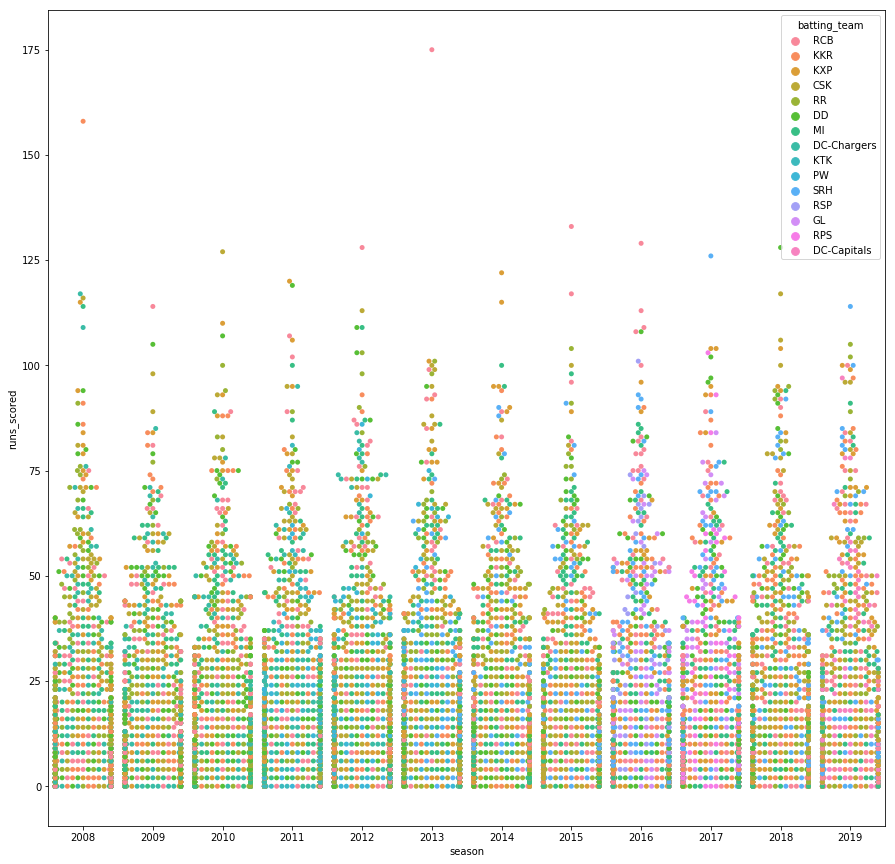

In [168]:
#plt.hist(df_batsman['runs_scored'])
plt.figure(figsize=(15,15))
sns.swarmplot(data=df_batsman,x='season',y='runs_scored',hue='batting_team')

In [163]:
df_batsman['strike_rate'].mean()

1.111655675583413

In [0]:
list_of_teams = list(df_batsman['batting_team'].unique())

In [178]:
list_of_teams

['RCB',
 'KKR',
 'KXP',
 'CSK',
 'RR',
 'DD',
 'MI',
 'DC-Chargers',
 'KTK',
 'PW',
 'SRH',
 'RSP',
 'GL',
 'RPS',
 'DC-Capitals']

In [180]:
list_of_teams[0]

'RCB'

In [189]:
df_batsman[df_batsman['batting_team'] == list_of_teams[0]].head()

,match_id,season,match_date,batsman,runs_scored,gross_balls_faced,4s,6s,dot_balls,wides_faced,no_balls_faced,1s,2s,3s,5s,net_balls_faced,strike_rate,level_0,player_out,out,batting_team
0,335982,2008,2008-04-18,AA Noffke,9.0,12,1,0,6,2.0,0.0,5,0,0,0,10.0,0.900000,inning_2,AA Noffke,1.0,RCB
1,335982,2008,2008-04-18,B Akhil,0.0,2,0,0,2,0.0,0.0,0,0,0,0,2.0,0.000000,inning_2,B Akhil,1.0,RCB
3,335982,2008,2008-04-18,CL White,6.0,10,0,0,5,0.0,0.0,4,1,0,0,10.0,0.600000,inning_2,CL White,1.0,RCB
5,335982,2008,2008-04-18,JH Kallis,8.0,7,0,1,4,0.0,0.0,2,0,0,0,7.0,1.142857,inning_2,JH Kallis,1.0,RCB
6,335982,2008,2008-04-18,MV Boucher,7.0,11,1,0,8,2.0,0.0,1,1,0,0,9.0,0.777778,inning_2,MV Boucher,1.0,RCB


In [0]:
team_batsman_performances = []


for team in list_of_teams:
  team_batsman_performances.append(df_batsman[df_batsman['batting_team'] == team])





In [0]:
team_strikes = [x['strike_rate'].mean() for x in team_batsman_performances]

In [196]:
team_strikes

[1.1196846455933493,
 1.139904632034497,
 1.0954845017785841,
 1.1734646180128274,
 1.093496736043312,
 1.0774329187754488,
 1.1288359092728362,
 1.0472554320230092,
 0.9573529840704127,
 0.992139949766391,
 1.1519055416192072,
 1.148273387371788,
 1.1229450427748957,
 1.1191753015983397,
 1.1561103764934628]

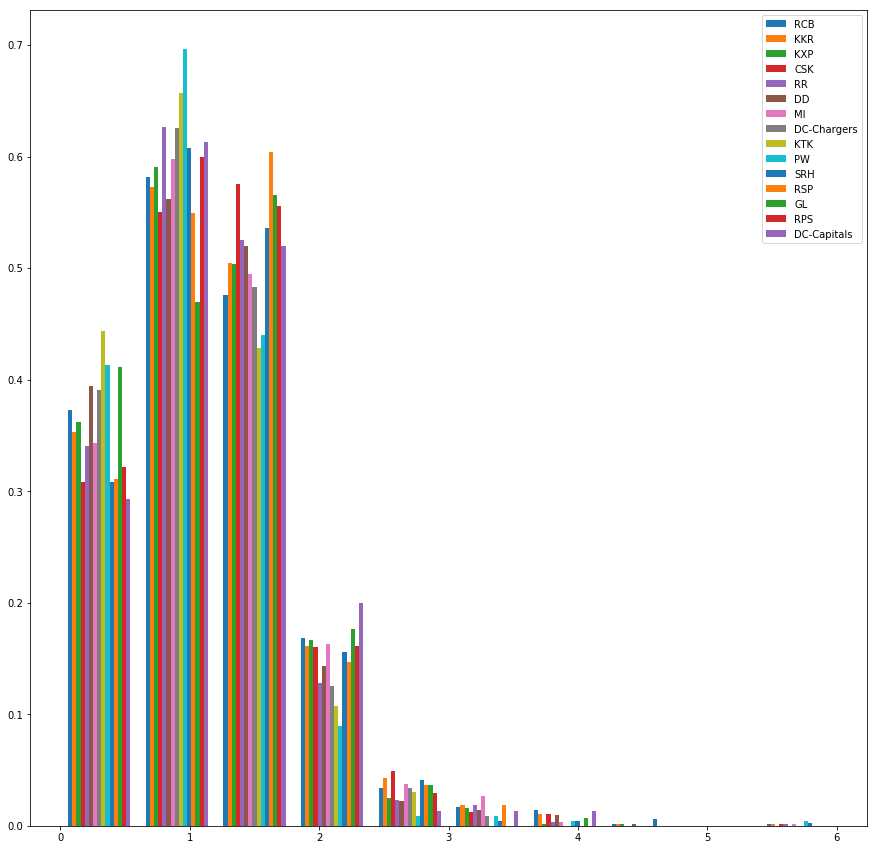

In [210]:
plt.figure(figsize=(15,15))
plt.hist([x['strike_rate'] for x in team_batsman_performances], density=1, histtype='bar',label=[x for x in list_of_teams]);
plt.legend()

ValueError: ignored

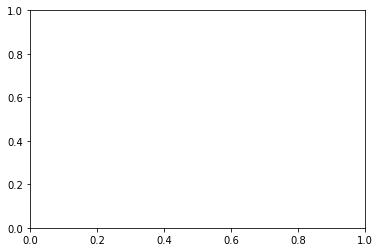

In [199]:
sns.distplot(,rug=True, hist=False)


## Runs being scored by season

In [0]:
#plt.plot(df_combined.groupby(['season'])['total'].sum())

## Runs by innings by season

In [0]:
plt.plot(df_combined.query('level_0 == "inning_1"').groupby(['season'])['total'].mean(),color='green')
plt.plot(df_combined.query('level_0 == "inning_2"').groupby(['season'])['total'].mean(),color='blue')
plt.show()


## Highest run scorer

In [113]:
pd.DataFrame(df_combined[['season','batsman','match_id','batsman_runs']].groupby(['season','batsman','match_id'])['batsman_runs'].sum()).sort_values(by = ['batsman_runs','season'], ascending = [False, True])

,,,batsman_runs
season,batsman,match_id,
2013,CH Gayle,598027,175.0
2008,BB McCullum,335982,158.0
2015,AB de Villiers,829795,133.0
2016,AB de Villiers,980987,129.0
2012,CH Gayle,548372,128.0
2018,RR Pant,1136602,128.0
2010,M Vijay,419137,127.0
2017,DA Warner,1082627,126.0
2014,V Sehwag,734047,122.0


In [245]:
df_batsman.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11141 entries, 0 to 11140
Data columns (total 16 columns):
match_id             11141 non-null int64
season               11141 non-null int64
match_date           11141 non-null datetime64[ns]
batsman              11141 non-null object
runs_scored          11141 non-null float64
gross_balls_faced    11141 non-null int64
4s                   11141 non-null int64
6s                   11141 non-null int64
dot_balls            11141 non-null int64
wides_faced          11141 non-null float64
no_balls_faced       11141 non-null float64
net_balls_faced      11141 non-null float64
strike_rate          11138 non-null float64
level_0              8663 non-null object
player_out           8663 non-null object
out                  8663 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(6), object(3)
memory usage: 1.4+ MB


In [246]:
df_batsman[['season','batsman','runs_scored','6s','4s','strike_rate']].sort_values(by=['runs_scored'],ascending=False)

,season,batsman,runs_scored,6s,4s,strike_rate
5233,2013,CH Gayle,175.0,17,13,2.692308
2,2008,BB McCullum,158.0,13,10,2.164384
7426,2015,AB de Villiers,133.0,4,19,2.293103
8257,2016,AB de Villiers,129.0,12,10,2.529412
10025,2018,RR Pant,128.0,7,15,2.031746
4652,2012,CH Gayle,128.0,13,7,2.098361
2202,2010,M Vijay,127.0,11,8,2.267857
9022,2017,DA Warner,126.0,8,10,2.135593
6768,2014,V Sehwag,122.0,8,12,2.140351
2753,2011,PC Valthaty,120.0,2,19,1.904762


### Individual stats

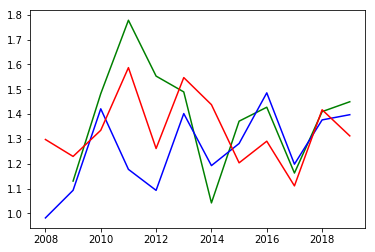

In [132]:
plt.plot(df_combined.query('batsman=="CH Gayle"').groupby(['season'])['batsman_runs'].mean(),color='green')
plt.plot(df_combined.query('batsman=="V Kohli"').groupby(['season'])['batsman_runs'].mean(),color='blue')
plt.plot(df_combined.query('batsman=="MS Dhoni"').groupby(['season'])['batsman_runs'].mean(),color='red')
plt.plot(df_combined.query('batsman=="YK Pathan"').groupby(['season'])['batsman_runs'].mean(),color='red')
plt.show()


In [254]:
df_batting_team_stats = df_combined.groupby(['match_id','season','match_date','city','venue','batting_team','winner',\
                     'team_1','team_2','winner_toss'],as_index=False)['total','batsman_runs','extras_runs'].agg({'total':'sum','batsman_runs':'sum','extras_runs':'sum','player_out':'count'})

/usr/local/lib/python3.6/dist-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
df_combined.groupby(['season','batsman'])['batsman_runs'].sum().nlargest(3)

In [0]:
pd.DataFrame(df_combined[['season','batsman','batsman_runs']].groupby(['season','batsman'])['batsman_runs'].sum()).sort_values(by = ['season','batsman_runs'], ascending = [True, False])

In [245]:
df_combined.head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
0,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
1,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
2,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
3,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
4,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012


In [246]:
df_combined['kind'].value_counts()

caught                   5227
bowled                   1563
run out                   830
lbw                       529
stumped                   280
caught and bowled         250
retired hurt               11
hit wicket                 10
obstructing the field       2
Name: kind, dtype: int64

In [0]:
df_combined.query('kind == "caught"')

In [0]:
#df_combined['catch_attributed_to'] = np.where(df_combined.kind.eq('caught'),df_combined.fielders, np.where(df_combined.kind.eq('caught and bowled'),df_combined.bowler,'na'))

In [0]:
df_fielders = pd.DataFrame(df_combined['fielders'].apply(pd.Series))
fielder_cols = ['fielder_1','fielder_2','fielder_3']
df_fielders.columns = fielder_cols

In [0]:
df_fielders[df_fielders.fielder_2.notnull()]


In [257]:
df_match_summary.team_1.unique()

array(['Rajasthan Royals', 'Mumbai Indians', 'Delhi Daredevils',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Deccan Chargers', 'Chennai Super Kings',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Pune Warriors', 'Gujarat Lions', 'Delhi Capitals',
       'Rising Pune Supergiant', 'Kochi Tuskers Kerala'], dtype=object)

In [0]:
df_batsman_value = df_combined[['season','match_id','match_date','batsman',\
             'batsman_runs','batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              'batsman'],as_index=False)['batsman_runs'].sum()

df_team_totals = df_combined[['season','match_id','match_date',\
                              'batting_team','total']].groupby(['season','match_id','match_date','batting_team',\
                                                              ],as_index=False)['total'].sum()

In [219]:
df_batsman_value.head()

,season,match_id,match_date,batting_team,batsman,batsman_runs
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0


In [220]:
df_team_totals.head()

,season,match_id,match_date,batting_team,total
0,2008,335982,2008-04-18,KKR,222.0
1,2008,335982,2008-04-18,RCB,82.0
2,2008,335983,2008-04-19,CSK,240.0
3,2008,335983,2008-04-19,KXP,207.0
4,2008,335984,2008-04-19,DD,132.0


In [0]:
df_team_season_scores = df_team_totals.groupby(['season','batting_team'],as_index=False)['total'].sum()

In [225]:
df_team_season_scores

,season,batting_team,total
0,2008,CSK,2520.0
1,2008,DC-Chargers,2229.0
2,2008,DD,2118.0
3,2008,KKR,1942.0
4,2008,KXP,2464.0
5,2008,MI,2078.0
6,2008,RCB,1983.0
7,2008,RR,2597.0
8,2009,CSK,2231.0
9,2009,DC-Chargers,2408.0


In [221]:
df_batsman_value.merge(df_team_totals,how='left',on=['season','match_id','match_date','batting_team'])

,season,match_id,match_date,batting_team,batsman,batsman_runs,total
0,2008,335982,2008-04-18,KKR,BB McCullum,158.0,222.0
1,2008,335982,2008-04-18,KKR,DJ Hussey,12.0,222.0
2,2008,335982,2008-04-18,KKR,Mohammad Hafeez,5.0,222.0
3,2008,335982,2008-04-18,KKR,RT Ponting,20.0,222.0
4,2008,335982,2008-04-18,KKR,SC Ganguly,10.0,222.0
5,2008,335982,2008-04-18,RCB,AA Noffke,9.0,82.0
6,2008,335982,2008-04-18,RCB,B Akhil,0.0,82.0
7,2008,335982,2008-04-18,RCB,CL White,6.0,82.0
8,2008,335982,2008-04-18,RCB,JH Kallis,8.0,82.0
9,2008,335982,2008-04-18,RCB,MV Boucher,7.0,82.0


In [0]:
df_batsman_value_season = df_batsman_value.groupby(['season','batting_team','batsman'],as_index=False)['batsman_runs'].sum()

In [228]:
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs
0,2008,CSK,A Mukund,0.0
1,2008,CSK,CK Kapugedera,16.0
2,2008,CSK,JA Morkel,241.0
3,2008,CSK,JDP Oram,18.0
4,2008,CSK,Joginder Sharma,16.0


In [233]:
df_batsman_value_season = df_batsman_value_season.merge(df_team_season_scores,how='left',on=['season','batting_team'])
df_batsman_value_season['batsman_value'] = df_batsman_value_season['batsman_runs']/df_batsman_value_season['total'] 
df_batsman_value_season.head()

,season,batting_team,batsman,batsman_runs,total,batsman_value
0,2008,CSK,A Mukund,0.0,2520.0,0.000000
1,2008,CSK,CK Kapugedera,16.0,2520.0,0.006349
2,2008,CSK,JA Morkel,241.0,2520.0,0.095635
3,2008,CSK,JDP Oram,18.0,2520.0,0.007143
4,2008,CSK,Joginder Sharma,16.0,2520.0,0.006349


In [244]:
df_batsman_value_season.sort_values(by=['batting_team','batsman_value','season',], ascending=[True, False, True]).query('season == "2011"')

,season,batting_team,batsman,batsman_runs,total,batsman_value
471,2011,CSK,MEK Hussey,492.0,2560.0,0.192188
478,2011,CSK,SK Raina,438.0,2560.0,0.171094
470,2011,CSK,M Vijay,434.0,2560.0,0.169531
475,2011,CSK,S Badrinath,396.0,2560.0,0.154688
472,2011,CSK,MS Dhoni,392.0,2560.0,0.153125
468,2011,CSK,JA Morkel,138.0,2560.0,0.053906
474,2011,CSK,S Anirudha,83.0,2560.0,0.032422
479,2011,CSK,WP Saha,68.0,2560.0,0.026562
467,2011,CSK,DJ Bravo,11.0,2560.0,0.004297
477,2011,CSK,SB Styris,5.0,2560.0,0.001953


In [214]:
df_combined.head()

,0_extras,batsman,batsman_runs,batting_team,bowler,byes,extras_runs,kind,legbyes,level_0,level_1,match_id,noballs,non_striker,player_out,total,wides,0.1,0_wickets,non_boundary,extras,penalty,method,over,fielder_1,fielder_2,fielder_3,delivery,catch_attributed_to,wicket_attributed_to,4_flag,6_flag,dot_ball_flag,1_run_flag,2_run_flag,3_run_flag,5_run_flag,wide_flag,noball_flag,legbye_flag,bye_flag,city,competition,toss_decision,eliminator,gender,match_type,method_ipl_summary,neutral_venue,overs,player_of_match,result,venue,winner,winner_toss,won_by_runs,won_by_wickets,match_date,team_1,team_2,umpire_1,umpire_2,umpire_3,umpire_4,season
0,NaN,V Kohli,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.1,548336,NaN,TM Dilshan,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
1,NaN,V Kohli,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.2,548336,NaN,TM Dilshan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
2,NaN,TM Dilshan,0.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.3,548336,NaN,V Kohli,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,3,None,None,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
3,NaN,TM Dilshan,1.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.4,548336,NaN,V Kohli,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4,None,None,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
4,NaN,V Kohli,2.0,RCB,A Chandila,NaN,0.0,NaN,NaN,inning_1,0.5,548336,NaN,TM Dilshan,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,5,None,None,NaN,NaN,NaN,NaN,1.0,NaN,NaN,False,False,False,False,Jaipur,IPL,field,NaN,male,T20,NaN,NaN,20,AB de Villiers,NaN,Sawai Mansingh Stadium,RCB,RR,46.0,NaN,2012-04-23,RR,RCB,Asad Rauf,S Asnani,None,None,2012
